In [1]:
import numpy as np 
import pyjet
from pysubjet import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import mplhep as hep 
plt.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [2]:
data=pd.read_hdf('LHColympics2020/events_anomalydetection_tiny.h5')
data

,0,1,2,3,4,5,6,7,8,9,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.324101,-0.361158,2.737669,0.409859,-2.429939,0.729830,0.867922,-2.267777,-1.161310,0.383031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.646304,-0.539460,-1.386258,0.471293,-1.636572,0.751657,0.453769,-1.099593,-0.393405,0.485929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.325172,-0.833948,2.404844,1.295058,-2.089618,-1.873342,0.451272,-0.101877,2.217348,0.461293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290918,-2.200063,1.630132,0.565028,-1.714345,-2.617103,0.951042,-0.532720,2.941473,0.896248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.526330,-2.349110,-1.745532,0.542491,-2.080352,-3.044045,0.390727,-1.278563,-2.131058,2.530358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.558454,-0.667654,0.445050,0.220177,-1.109788,2.691200,0.426006,-1.355901,2.359371,0.188318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,3.224277,-2.394595,-1.716092,0.461683,-2.102307,-2.378719,0.444322,-0.673169,1.017897,0.664407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.308288,-0.381152,-2.721488,2.390583,-0.784246,-2.640125,2.609883,-0.758702,3.080750,2.774264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.195123,-2.203834,-3.064237,0.497103,-2.253029,-0.701283,0.434465,-1.692405,-2.279329,0.676338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
with cluster_events(data=data, R=1.0, ptmin=20.0, stop=1) as event:
    for N, jets, truth in event:
        
        jet_trees=decluster_jet(jets)
        
        tree=jet_trees[0]

        idx_nodes=list(nx.nodes(tree))
        subjets=nx.get_node_attributes(tree,'pseudojet')
        is_Primary_Branch=nx.get_node_attributes(tree,'primary_branch')
        features=nx.get_node_attributes(tree,'feature')
        
        for n in idx_nodes:
            print('Primary={}, feature={}, subjet={}'.format( is_Primary_Branch[n],features[n],subjets[n]))
            

Primary=True, feature=None, subjet=PseudoJet(pt=1286.728, eta=0.186, phi=-2.764, mass=106.912)
Primary=False, feature=None, subjet=PseudoJet(pt=1.111, eta=0.216, phi=-1.766, mass=0.000)
Primary=True, feature=None, subjet=PseudoJet(pt=1286.126, eta=0.185, phi=-2.764, mass=100.544)
Primary=False, feature=None, subjet=PseudoJet(pt=0.324, eta=-0.361, phi=2.738, mass=-0.000)
Primary=True, feature=None, subjet=PseudoJet(pt=1285.896, eta=0.186, phi=-2.764, mass=98.677)
Primary=False, feature=None, subjet=PseudoJet(pt=2.313, eta=-0.295, phi=-2.491, mass=0.104)
Primary=True, feature=None, subjet=PseudoJet(pt=1283.668, eta=0.186, phi=-2.765, mass=93.764)
Primary=False, feature=None, subjet=PseudoJet(pt=42.563, eta=0.171, phi=-2.412, mass=5.737)
Primary=True, feature=None, subjet=PseudoJet(pt=1243.814, eta=0.187, phi=-2.777, mass=28.246)
Primary=False, feature=None, subjet=PseudoJet(pt=2.003, eta=0.417, phi=-2.681, mass=0.000)
Primary=True, feature=None, subjet=PseudoJet(pt=1241.820, eta=0.186, p

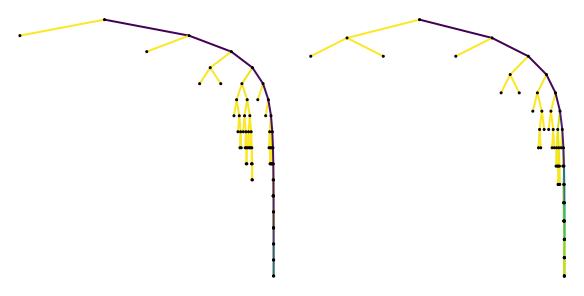

In [6]:
draw_event_trees(jet_trees)

Exctracting the Adjencency matrix of the jet trees in the first event:

In [11]:
with cluster_events(data=data, R=1.0, ptmin=20.0, stop=1) as event:
    for N, jets, truth in event:
        
        jet_trees=decluster_jet(jets)
        
        for jet in jet_trees:
            
            M_adj=nx.to_numpy_array(jet,weight=None)
            
pd.DataFrame(M_adj)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
R=1.0
ptmin=20.0

def lund_triangle(j, j1, j2, R=1.0):
    if j1.pt < j2.pt:
        j1,j2=j2,j1
        
    Delta=deltaR(j1,j2)     # Lund obseravble
    kt=j2.pt*deltaR(j1,j2)  # Lund obseravble
        
    return Delta, kt 


lund_0={'signal':[], 'background':[]}
lund_1={'signal':[], 'background':[]}
mass={'signal':[], 'background':[]}
massdrop={'signal':[], 'background':[]}

with cluster_events(data=data, R=R, ptmin=ptmin) as event:
    for N, jets, truth in event:
                    
        jet_trees=decluster_jet(jets, node_feature=lund_triangle, label=truth)

        for n,jet in enumerate(jet_trees):

            is_Features=list( nx.get_node_attributes(jet,'feature').values() )          
            is_Primary_branch=list( nx.get_node_attributes(jet,'primary_branch').values() ) 

            for primary, feat in zip(is_Primary_branch, is_Features):
                if primary and feat:

                    Delta=feat[0]
                    kt=feat[1]

                    if truth:
                        lund_0['signal'].append(np.log(R/Delta))
                        lund_1['signal'].append(np.log(kt))                        
                    else:
                        lund_0['background'].append(np.log(R/Delta))
                        lund_1['background'].append(np.log(kt)) 


Text(0, 1, '$\\log(k_t)$')

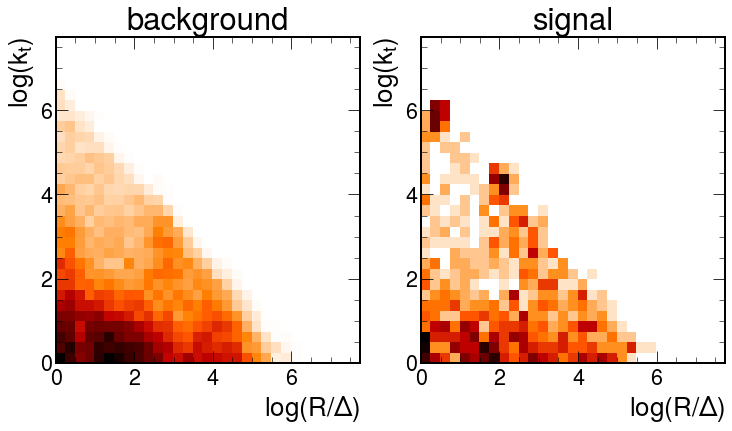

In [24]:
xedges = np.arange(0.,8,0.25)
yedges = np.arange(0,8,0.25)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
plt.hist2d(lund_0['background'],lund_1['background'],bins=(xedges, yedges),cmap='gist_heat_r')
plt.title('background',  loc='center')
ax1.set_xlabel('$\log(R/\Delta)$')
ax1.set_ylabel('$\log(k_t)$')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(lund_0['signal'],lund_1['signal'],bins=(xedges, yedges),cmap='gist_heat_r')
plt.title('signal',  loc='center')
ax2.set_xlabel('$\log(R/\Delta)$')
ax2.set_ylabel('$\log(k_t)$')
